In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import pandas as pd
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import Table
from astropy.config import set_temp_cache
import os
import time
import urllib.error


# Get stellar data from the file

In [2]:
hdu_stellar = fits.open('data/dr1_galaxy_lowZ_stellarmass_UCMGs_10.3.fits')
hdu_stellar.info()

Filename: data/dr1_galaxy_lowZ_stellarmass_UCMGs_10.3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    854   2331R x 423C   [K, 7A, 6A, J, D, D, D, D, 3A, I, J, J, 3A, E, E, E, E, E, E, E, E, E, E, E, I, E, E, D, E, E, E, E, E, D, D, I, L, E, E, E, E, E, E, E, E, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D

In [3]:
hdu_stellar[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 3230 / length of dimension 1                          
NAXIS2  =                 2331 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  423 / number of table fields                         
TTYPE1  = 'TARGETID'                                                            
TFORM1  = 'K       '                                                            
TTYPE2  = 'SURVEY  '                                                            
TFORM2  = '7A      '                                                            
TTYPE3  = 'PROGRAM '        

In [4]:
# Convert FITS BINTABLE to astropy Table
stellar_table = Table(hdu_stellar[1].data)

# Display basic info about the table
print(f"Number of rows: {len(stellar_table)}")
print(f"Number of columns: {len(stellar_table.colnames)}")
print(f"Column names: {stellar_table.colnames}")
print("\nFirst few rows:")
stellar_table[:5]

Number of rows: 2331
Number of columns: 423
Column names: ['TARGETID', 'SURVEY', 'PROGRAM', 'HEALPIX', 'Z', 'ZERR', 'TARGET_RA', 'TARGET_DEC', 'OBJTYPE', 'RELEASE', 'BRICKID', 'BRICK_OBJID', 'MORPHTYPE', 'EBV', 'FLUX_G', 'FLUX_R', 'FLUX_Z', 'FLUX_W1', 'FLUX_W2', 'FLUX_IVAR_G', 'FLUX_IVAR_R', 'FLUX_IVAR_Z', 'FLUX_IVAR_W1', 'FLUX_IVAR_W2', 'MASKBITS', 'SERSIC', 'SHAPE_R', 'SHAPE_R_kpc', 'SHAPE_E1', 'SHAPE_E2', 'GAIA_PHOT_G_MEAN_MAG', 'GAIA_PHOT_BP_MEAN_MAG', 'GAIA_PHOT_RP_MEAN_MAG', 'PLATE_RA', 'PLATE_DEC', 'COADD_NUMEXP', 'ZCAT_PRIMARY', 'SHAPE_R_IVAR', 'SHAPE_E1_IVAR', 'SHAPE_E2_IVAR', 'DEPTH_G', 'DEPTH_R', 'DEPTH_Z', 'DEPTH_W1', 'DEPTH_W2', 'FLUX_SCALE', 'SNR_MED', 'AV_CG', 'AVERR_CG', 'AGE_CG', 'AGEERR_CG', 'TAU_CG', 'TAUERR_CG', 'Z_CG', 'ZERR_CG', 'SFR_CG', 'SFRERR_CG', 'MASS_CG', 'MASSERR_CG', 'SNR_SL', 'SNRERR_SL', 'MASSINI_SL', 'MASSCOR_SL', 'V0_SL', 'VD_SL', 'AV_SL', 'AGE_SL', 'Z_SL', 'MGII2796_CENTER', 'MGII2796_CENTERERR', 'MGII2796_FLUX', 'MGII2796_FLUXERR', 'MGII2796_SIGMA',

TARGETID,SURVEY,PROGRAM,HEALPIX,Z,ZERR,TARGET_RA,TARGET_DEC,OBJTYPE,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,MASKBITS,SERSIC,SHAPE_R,SHAPE_R_kpc,SHAPE_E1,SHAPE_E2,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PLATE_RA,PLATE_DEC,COADD_NUMEXP,ZCAT_PRIMARY,SHAPE_R_IVAR,SHAPE_E1_IVAR,SHAPE_E2_IVAR,DEPTH_G,DEPTH_R,DEPTH_Z,DEPTH_W1,DEPTH_W2,FLUX_SCALE,SNR_MED,AV_CG,AVERR_CG,AGE_CG,AGEERR_CG,TAU_CG,TAUERR_CG,Z_CG,ZERR_CG,SFR_CG,SFRERR_CG,MASS_CG,MASSERR_CG,SNR_SL,SNRERR_SL,MASSINI_SL,MASSCOR_SL,V0_SL,VD_SL,AV_SL,AGE_SL,Z_SL,MGII2796_CENTER,MGII2796_CENTERERR,MGII2796_FLUX,MGII2796_FLUXERR,MGII2796_SIGMA,MGII2796_SIGMAERR,MGII2796_CONT,MGII2796_CONTERR,MGII2796_EW,MGII2796_EWERR,MGII2803_CENTER,MGII2803_CENTERERR,MGII2803_FLUX,MGII2803_FLUXERR,MGII2803_SIGMA,MGII2803_SIGMAERR,MGII2803_CONT,MGII2803_CONTERR,MGII2803_EW,MGII2803_EWERR,NEV3346_CENTER,NEV3346_CENTERERR,NEV3346_FLUX,NEV3346_FLUXERR,NEV3346_SIGMA,NEV3346_SIGMAERR,NEV3346_CONT,NEV3346_CONTERR,NEV3346_EW,NEV3346_EWERR,NEV3426_CENTER,NEV3426_CENTERERR,NEV3426_FLUX,NEV3426_FLUXERR,NEV3426_SIGMA,NEV3426_SIGMAERR,NEV3426_CONT,NEV3426_CONTERR,NEV3426_EW,NEV3426_EWERR,OII3726_CENTER,OII3726_CENTERERR,OII3726_FLUX,OII3726_FLUXERR,OII3726_SIGMA,OII3726_SIGMAERR,OII3726_CONT,OII3726_CONTERR,OII3726_EW,OII3726_EWERR,OII3729_CENTER,OII3729_CENTERERR,OII3729_FLUX,OII3729_FLUXERR,OII3729_SIGMA,OII3729_SIGMAERR,OII3729_CONT,OII3729_CONTERR,OII3729_EW,OII3729_EWERR,NEIII3869_CENTER,NEIII3869_CENTERERR,NEIII3869_FLUX,NEIII3869_FLUXERR,NEIII3869_SIGMA,NEIII3869_SIGMAERR,NEIII3869_CONT,NEIII3869_CONTERR,NEIII3869_EW,NEIII3869_EWERR,NEIII3967_CENTER,NEIII3967_CENTERERR,NEIII3967_FLUX,NEIII3967_FLUXERR,NEIII3967_SIGMA,NEIII3967_SIGMAERR,NEIII3967_CONT,NEIII3967_CONTERR,NEIII3967_EW,NEIII3967_EWERR,HEPSILON_CENTER,HEPSILON_CENTERERR,HEPSILON_FLUX,HEPSILON_FLUXERR,HEPSILON_SIGMA,HEPSILON_SIGMAERR,HEPSILON_CONT,HEPSILON_CONTERR,HEPSILON_EW,HEPSILON_EWERR,HEI4026_CENTER,HEI4026_CENTERERR,HEI4026_FLUX,HEI4026_FLUXERR,HEI4026_SIGMA,HEI4026_SIGMAERR,HEI4026_CONT,HEI4026_CONTERR,HEI4026_EW,HEI4026_EWERR,HDELTA_CENTER,HDELTA_CENTERERR,HDELTA_FLUX,HDELTA_FLUXERR,HDELTA_SIGMA,HDELTA_SIGMAERR,HDELTA_CONT,HDELTA_CONTERR,HDELTA_EW,HDELTA_EWERR,HGAMMA_CENTER,HGAMMA_CENTERERR,HGAMMA_FLUX,HGAMMA_FLUXERR,HGAMMA_SIGMA,HGAMMA_SIGMAERR,HGAMMA_CONT,HGAMMA_CONTERR,HGAMMA_EW,HGAMMA_EWERR,OIII4363_CENTER,OIII4363_CENTERERR,OIII4363_FLUX,OIII4363_FLUXERR,OIII4363_SIGMA,OIII4363_SIGMAERR,OIII4363_CONT,OIII4363_CONTERR,OIII4363_EW,OIII4363_EWERR,HEI4471_CENTER,HEI4471_CENTERERR,HEI4471_FLUX,HEI4471_FLUXERR,HEI4471_SIGMA,HEI4471_SIGMAERR,HEI4471_CONT,HEI4471_CONTERR,HEI4471_EW,HEI4471_EWERR,HEII4686_CENTER,HEII4686_CENTERERR,HEII4686_FLUX,HEII4686_FLUXERR,HEII4686_SIGMA,HEII4686_SIGMAERR,HEII4686_CONT,HEII4686_CONTERR,HEII4686_EW,HEII4686_EWERR,HBETA_CENTER,HBETA_CENTERERR,HBETA_FLUX,HBETA_FLUXERR,HBETA_SIGMA,HBETA_SIGMAERR,HBETA_CONT,HBETA_CONTERR,HBETA_EW,HBETA_EWERR,OIII4959_CENTER,OIII4959_CENTERERR,OIII4959_FLUX,OIII4959_FLUXERR,OIII4959_SIGMA,OIII4959_SIGMAERR,OIII4959_CONT,OIII4959_CONTERR,OIII4959_EW,OIII4959_EWERR,OIII5007_CENTER,OIII5007_CENTERERR,OIII5007_FLUX,OIII5007_FLUXERR,OIII5007_SIGMA,OIII5007_SIGMAERR,OIII5007_CONT,OIII5007_CONTERR,OIII5007_EW,OIII5007_EWERR,NII5755_CENTER,NII5755_CENTERERR,NII5755_FLUX,NII5755_FLUXERR,NII5755_SIGMA,NII5755_SIGMAERR,NII5755_CONT,NII5755_CONTERR,NII5755_EW,NII5755_EWERR,HEI5876_CENTER,HEI5876_CENTERERR,HEI5876_FLUX,HEI5876_FLUXERR,HEI5876_SIGMA,HEI5876_SIGMAERR,HEI5876_CONT,HEI5876_CONTERR,HEI5876_EW,HEI5876_EWERR,OI6300_CENTER,OI6300_CENTERERR,OI6300_FLUX,OI6300_FLUXERR,OI6300_SIGMA,OI6300_SIGMAERR,OI6300_CONT,OI6300_CONTERR,OI6300_EW,OI6300_EWERR,SIII6312_CENTER,SIII6312_CENTERERR,SIII6312_FLUX,SIII6312_FLUXERR,SIII6312_SIGMA,SIII6312_SIGMAERR,SIII6312_CONT,SIII6312_CONTERR,SIII6312_EW,SIII6312_EWERR,NII6548_CENTER,NII6548_CENTERERR,NII6548_FLUX,NII6548_

In [5]:
df_stellar = stellar_table.to_pandas()
df_stellar

,TARGETID,SURVEY,PROGRAM,HEALPIX,Z,ZERR,TARGET_RA,TARGET_DEC,OBJTYPE,RELEASE,...,SIII9533_SIGMAERR,SIII9533_CONT,SIII9533_CONTERR,SIII9533_EW,SIII9533_EWERR,DN4000,DN4000_ERR,log_MASS_CG,log_SHAPE_R_kpc,log_SFR_CG
0,2842177667334144,main,dark,36635,0.031233,0.000006,46.308696,-14.381102,TGT,9010,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.982828,0.012129,11.005117,0.213738,-1.959241
1,2842393434914816,main,dark,27160,0.082772,0.000005,147.661805,-5.612366,TGT,9010,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.260604,0.013414,10.779338,0.236007,0.744826
2,2842417304698883,main,dark,40933,0.020090,0.000006,134.650339,-4.602488,TGT,9010,...,2.422362,73.664627,0.241124,0.240545,0.21683,1.933718,0.015664,9.974388,-0.336774,-3.305260
3,2842483734085634,main,dark,27296,0.077199,0.000004,137.416176,-1.709761,TGT,9010,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.440066,0.007298,10.780585,0.238447,0.083899
4,2842484891713536,main,dark,25995,0.087962,0.000003,206.374604,-1.667451,TGT,9010,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.249195,0.015261,11.130156,0.533889,1.163439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326,2305843036774470794,sv3,backup,26285,0.209866,0.000035,183.176408,1.078023,TGT,9010,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.442677,0.029868,10.854461,0.243753,0.454585
2327,2305843037609138782,main,backup,27082,0.056960,0.000018,167.008299,2.608687,TGT,9010,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.607540,0.045739,10.376631,0.041679,-0.655664
2328,2305843038653517105,main,backup,28079,0.111267,0.000010,183.158385,21.103537,TGT,9010,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.345531,0.027619,11.144555,0.508815,0.894812
2329,2305843042155796213,main,backup,31419,0.159600,0.000024,229.201875,2.638995,TGT,9010,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.405456,0.026181,10.903032,0.234924,1.077031


In [65]:
df_stellar['HEALPIX'].unique().shape

(1945,)

# Get spectrum from DESI

In [7]:
# Define the spectroscopic product directory
desi_root = "https://data.desi.lbl.gov/public/dr1//spectro/redux/iron"


In [8]:
def save_spectrum_to_fits(filename, wave, flux, ivar, mask):
    """
    Save the spectrum data to a FITS file.
    
    Parameters:
    - targetid: Unique identifier for the target
    - wave: Dictionary with wavelength data for each camera
    - flux: Dictionary with flux data for each camera
    - ivar: Dictionary with inverse variance data for each camera
    - mask: Dictionary with mask data for each camera
    """
    # Ensure the output directory exists
    out_folder = './data/spectra7411/'
    os.makedirs(out_folder, exist_ok=True)
    
    # Define the output path
    out_path = os.path.join(out_folder, filename)
    
    # Create HDUList with PrimaryHDU and BinTableHDUs for each camera
    hdus = []
    hdus.append(fits.PrimaryHDU())
    
    for cam in ['B', 'R', 'Z']:
        cols = [
            fits.Column(name='WAVELENGTH', format='D', array=wave[cam]),
            fits.Column(name='FLUX'      , format='D', array=flux[cam]),
            fits.Column(name='IVAR'      , format='D', array=ivar[cam]),
            fits.Column(name='MASK'      , format='J', array=mask[cam]),
        ]
        table_hdu = fits.BinTableHDU.from_columns(cols, name=f'SPECTRUM_{cam}')
        hdus.append(table_hdu)
    
    # Write the HDUList to a FITS file
    hdulist = fits.HDUList(hdus)
    hdulist.writeto(out_path, overwrite=True)
    print(f"Saved spectrum for TARGETID {targetid} to {out_path}")

In [24]:
def load_fits_spectrum(target, out_folder='./data/spectra7411/'):
    """
    Load the spectrum data from a FITS file.
    
    Parameters:
    - targetid: Unique identifier for the target
    - out_folder: Directory containing the FITS files

    Returns:
    - wave: Dictionary with wavelength data for each camera
    - flux: Dictionary with flux data for each camera
    - ivar: Dictionary with inverse variance data for each camera
    - mask: Dictionary with mask data for each camera
    """
    
    # out_folder = './data/spectra'
    targetid = target['TARGETID']
    survey = target['SURVEY']
    program = target['PROGRAM']
    healpix = target['HEALPIX']

    out_path = os.path.join(out_folder, f'{targetid}_{survey}_{program}_{healpix}.fits')
    print(out_path)

    if not os.path.exists(out_path):
        raise FileNotFoundError(f"Spectrum file for TARGETID {targetid} not found.")
    
    hdu_spectrum = fits.open(out_path)
    
    wave = dict()
    flux = dict()
    ivar = dict()
    mask = dict()
    
    for cam in ['B', 'R', 'Z']:
        wave[cam] = hdu_spectrum[f'SPECTRUM_{cam}'].data['WAVELENGTH']
        flux[cam] = hdu_spectrum[f'SPECTRUM_{cam}'].data['FLUX']
        ivar[cam] = hdu_spectrum[f'SPECTRUM_{cam}'].data['IVAR']
        mask[cam] = hdu_spectrum[f'SPECTRUM_{cam}'].data['MASK']
    
    return wave, flux, ivar, mask


In [7]:
def get_values(hdu_coadd, target_index):
    """
    Extracts wavelength, flux, inverse variance, and mask data for a given target index
    from the coadd HDU.
    """
    # Extract data for the specified target index
    wave = dict()
    flux = dict()
    ivar = dict()
    mask = dict()
    for camera in ['B', 'R', 'Z']:
        wave[camera] = hdu_coadd[f'{camera}_WAVELENGTH'].data
        flux[camera] = hdu_coadd[f'{camera}_FLUX'].data[target_index]
        ivar[camera] = hdu_coadd[f'{camera}_IVAR'].data[target_index]
        mask[camera] = hdu_coadd[f'{camera}_MASK'].data[target_index]
    return wave, flux, ivar, mask


In [8]:
def plot_spectrum(wave, flux, ivar, mask, targetid, redshift, issave=False):
    """
    Plots the spectrum for a given target.
    """
    plt.figure(figsize=(8, 3))
    for camera in ['B', 'R', 'Z']:
        w = wave[camera]
        f = flux[camera]
        i = ivar[camera]
        m = np.bool(mask[camera])
        plt.plot(w[~m], f[~m], label=f'{camera} band', lw=0.5)
        # plt.fill_between(w[~m], f[~m] - 1/np.sqrt(i[~m]), f[~m] + 1/np.sqrt(i[~m]), alpha=0.2)
    plt.xlabel('Wavelength (Angstroms)')
    plt.ylabel('Flux (arbitrary units)')
    plt.title(f'Spectrum for TARGETID {targetid} at redshift {redshift:.3f}')
    plt.legend()
    plt.grid(linestyle='--', alpha=0.5)
    plt.tight_layout()
    if issave:
        plt.savefig(f'./figs/spectra/{targetid}.png', dpi=300)
        plt.close()
    else:
        plt.show()


# Old run

In [69]:
start = 40
num = 20
for i, row in df_stellar[start:start + num].iterrows():

    redshift = row['Z']
    targetid = row['TARGETID']
    survey = row['SURVEY']
    program = row['PROGRAM']
    healpix = row['HEALPIX']
    hpixgroup = healpix // 100
    print(f"Row {i}: SURVEY={survey}, PROGRAM={program}, HEALPIX={healpix}, HPixGroup={hpixgroup}")
    # Filename
    coadd_filepath = f'{desi_root}/healpix/{survey}/{program}/{hpixgroup}/{healpix}/coadd-{survey}-{program}-{healpix}.fits'
    
    with set_temp_cache(path='./data/stellars/', delete=False):
        hdu_coadd = fits.open(coadd_filepath, cache=True)
    # hdu_coadd.info()

    df_fiber = pd.DataFrame(hdu_coadd['FIBERMAP'].data)
    cond = df_fiber['TARGETID'] == targetid
    target_index = df_fiber.index[cond][0]  # Get the first index where condition is True

    wave, flux, ivar, mask = get_values(hdu_coadd, target_index)

    plot_spectrum(wave, flux, ivar, mask, targetid, redshift, issave=True)
    # Save the spectrum to a FITS file
    save_spectrum_to_fits(targetid, wave, flux, ivar, mask)
    # Break after processing the first target for demonstration purposes
    

Row 40: SURVEY=main, PROGRAM=dark, HEALPIX=36215, HPixGroup=362
Saved spectrum for TARGETID 39627398156650182 to ./data/spectra/39627398156650182.fits
Row 41: SURVEY=main, PROGRAM=bright, HEALPIX=36321, HPixGroup=363
Saved spectrum for TARGETID 39627398156650182 to ./data/spectra/39627398156650182.fits
Row 41: SURVEY=main, PROGRAM=bright, HEALPIX=36321, HPixGroup=363
Saved spectrum for TARGETID 39627409623881008 to ./data/spectra/39627409623881008.fits
Row 42: SURVEY=main, PROGRAM=bright, HEALPIX=17443, HPixGroup=174
Saved spectrum for TARGETID 39627409623881008 to ./data/spectra/39627409623881008.fits
Row 42: SURVEY=main, PROGRAM=bright, HEALPIX=17443, HPixGroup=174
Saved spectrum for TARGETID 39627426560484059 to ./data/spectra/39627426560484059.fits
Row 43: SURVEY=main, PROGRAM=bright, HEALPIX=36312, HPixGroup=363
Saved spectrum for TARGETID 39627426560484059 to ./data/spectra/39627426560484059.fits
Row 43: SURVEY=main, PROGRAM=bright, HEALPIX=36312, HPixGroup=363
Saved spectrum for

# Example of how to load a spectrum from a file and plot it.

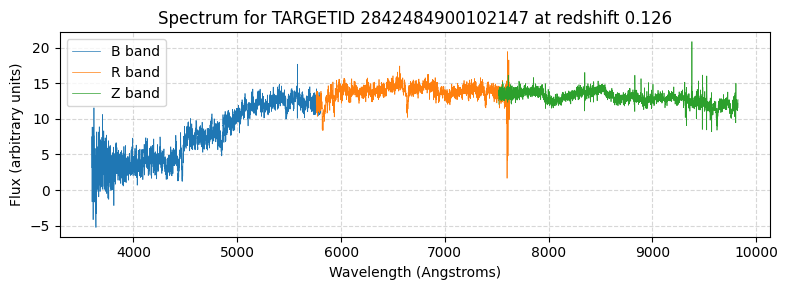

In [67]:
test_targetid = 2842484900102147
redshift = df_stellar.loc[df_stellar['TARGETID'] == test_targetid, 'Z'].values[0]
hdu_test = load_fits_spectrum(test_targetid)
plot_spectrum(*hdu_test, targetid=test_targetid, redshift=redshift, issave=False)

# Get spectra for all INSPIRE 2 targets

In [1]:
df_ucmgs = pd.read_csv('data/UCMGS_Sigma_10.5_Vdisp_130_Mstar_E10_SFR_50_NoBalmer_age_5.csv')
df_ucmgs

NameError: name 'pd' is not defined

In [3]:
df_healpix = df_ucmgs.groupby(['SURVEY', 'PROGRAM', 'HEALPIX']).size().reset_index(name='COUNT').sort_values(by='COUNT', ascending=False)
df_healpix

,SURVEY,PROGRAM,HEALPIX,COUNT
2101,main,bright,16023,6
1557,main,bright,10730,5
1100,main,bright,9206,5
1976,main,bright,13443,5
1102,main,bright,9210,5
...,...,...,...,...
2291,main,bright,18317,1
2290,main,bright,18316,1
2289,main,bright,18315,1
2288,main,bright,18308,1


In [5]:

def download_with_retry(coadd_filepath, max_retries=3, timeout=600, cache_path='./data/ucmgs7411/'):
    """Download FITS file with retry logic and timeout handling."""
    for attempt in range(max_retries):
        try:
            print(f"Attempt {attempt + 1}/{max_retries} to download: {coadd_filepath}")
            with set_temp_cache(path=cache_path, delete=False):
                hdu_coadd = fits.open(coadd_filepath, cache=True, timeout=timeout)
            return hdu_coadd
        except (TimeoutError, urllib.error.URLError, OSError) as e:
            print(f"Attempt {attempt + 1} failed: {e}")
            if attempt < max_retries - 1:
                wait_time = 2 ** attempt  # Exponential backoff
                print(f"Waiting {wait_time} seconds before retry...")
                time.sleep(wait_time)
            else:
                print(f"All {max_retries} attempts failed for {coadd_filepath}")
                return None
    return None

In [79]:
def download_with_no_cache_with_retry(coadd_filepath, max_retries=3, timeout=600, cache_path='./data/ucmgs7411/'):
    """
    Download FITS file with retry logic and timeout handling, without using cache.
    
    Parameters:
    - coadd_filepath: URL of the FITS file to download
    - max_retries: Maximum number of retry attempts
    - timeout: Timeout for each download attempt
    - cache_path: Directory to store the downloaded file
    
    Returns:
    - hdu_coadd: HDUList object containing the FITS data
    """
    for attempt in range(max_retries):
        try:
            print(f"Attempt {attempt + 1}/{max_retries} to download: {coadd_filepath}")
            with set_temp_cache(path=cache_path, delete=False):
                hdu_coadd = fits.open(coadd_filepath, cache=False, timeout=timeout)
            return hdu_coadd
        except (TimeoutError, urllib.error.URLError, OSError) as e:
            print(f"Attempt {attempt + 1} failed: {e}")
            if attempt < max_retries - 1:
                wait_time = 2 ** attempt  # Exponential backoff
                print(f"Waiting {wait_time} seconds before retry...")
                time.sleep(wait_time)
            else:
                print(f"All {max_retries} attempts failed for {coadd_filepath}")
                return None
    return None

In [ ]:
# Define the spectroscopic product directory
desi_root = "https://data.desi.lbl.gov/public/dr1//spectro/redux/iron"
out_folder = './data/spectra7411/'
cache_path = './data/ucmgs7411/'

start = 3200
num = 3000
for i, (_, row_healpix) in enumerate(df_healpix[start:start + num].iterrows()):
    survey = row_healpix['SURVEY']
    program = row_healpix['PROGRAM']
    healpix = row_healpix['HEALPIX']
    
    # Calculate the HPixGroup
    hpixgroup = healpix // 100
    print(f"Row {i + start}: SURVEY={survey}, PROGRAM={program}, HEALPIX={healpix}, HPixGroup={hpixgroup}")
    # Filename
    coadd_filepath = f'{desi_root}/healpix/{survey}/{program}/{hpixgroup}/{healpix}/coadd-{survey}-{program}-{healpix}.fits'

    cond = (df_ucmgs['SURVEY'] == survey) & (df_ucmgs['PROGRAM'] == program) & (df_ucmgs['HEALPIX'] == healpix)
    df_temp = df_ucmgs[cond]

    num_targets = len(df_temp)
    count = 0
    for _, row in df_temp.iterrows():
        targetid = row['TARGETID']
        filename = f'{targetid}_{survey}_{program}_{healpix}.fits'
        out_path = os.path.join(out_folder, filename)
        if os.path.exists(out_path):
            count += 1
    
    if count == num_targets:
        print(f"All {num_targets} targets for HEALPIX {healpix} already processed. Skipping download.")
        continue

    # Try to download with retry logic
    # hdu_coadd = download_with_retry(coadd_filepath, max_retries=5, timeout=600, cache_path='./data/ucmgs7411/')
    hdu_coadd = download_with_retry(coadd_filepath, max_retries=5, timeout=600, cache_path=cache_path)

    if hdu_coadd is None:
        print(f"Failed to download or open the FITS file for HEALPIX {healpix}. Skipping this HEALPIX.")
        continue
            
    for i, row in df_ucmgs[cond].iterrows():
        redshift = row['Z']
        targetid = row['TARGETID']
    
        df_fiber = pd.DataFrame(hdu_coadd['FIBERMAP'].data)
        cond = df_fiber['TARGETID'] == targetid
        target_index = df_fiber.index[cond][0]  # Get the first index where condition is True

        wave, flux, ivar, mask = get_values(hdu_coadd, target_index)

        # plot_spectrum(wave, flux, ivar, mask, targetid, redshift, issave=True)
        # Save the spectrum to a FITS file
        filename = f'{targetid}_{survey}_{program}_{healpix}.fits'
        save_spectrum_to_fits(filename, wave, flux, ivar, mask)
        # Load the spectrum from the FITS file
        # 
    # Clear the cahche folder
    if (i + start) % 100 == 0:
        print(f"Processed {i + start} HEALPIX groups. Clearing cache folder.")
        folder_to_delete = os.path.join(cache_path, 'astropy')
        os.system(f'rm -rf {folder_to_delete}')
        print(f"Cache folder {folder_to_delete} cleared.")
    
    


./data/spectra7411/39628060793768059_main_dark_19971.fits


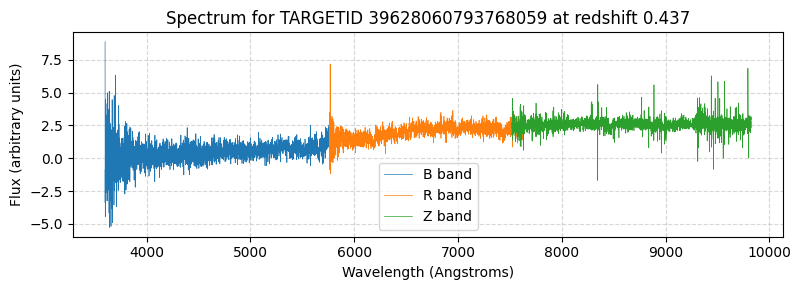

In [47]:
i = 3093
temp = df_ucmgs.loc[i, ['TARGETID', 'SURVEY', 'PROGRAM', 'HEALPIX', 'Z']]
redshift = temp['Z']
wave, flux, ivar, mask = load_fits_spectrum(temp, out_folder='./data/spectra7411/')
plot_spectrum(wave, flux, ivar, mask, targetid=temp['TARGETID'], redshift=redshift, issave=False)